# K-nearest neighbor

First off, let's do the preprocessing presented in [Data Process](./dataProcess.ipynb):

In [1]:
%%capture

import sys
!{sys.executable} -m pip install nbformat

%run -G ./dataProcess.ipynb

In [2]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## KNN model

In [4]:
# train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

# evaluate model
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.76      0.85        90

    accuracy                           1.00     56746
   macro avg       0.99      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## Parameter tunning

### PCA optimization

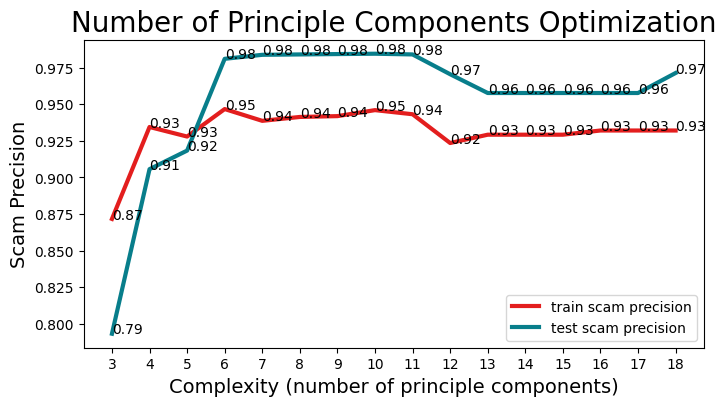

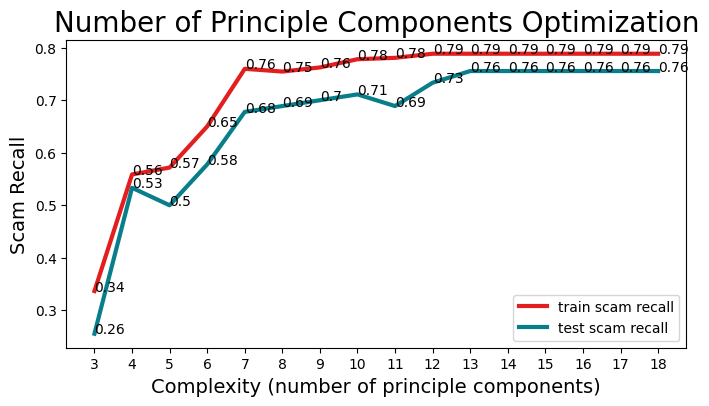

In [5]:
from sklearn import decomposition
precision_train_df = []
precision_test_df = []
recall_train_df = []
recall_test_df = []

from imblearn.under_sampling import RandomUnderSampler

for k in range(3, 19):
    X = df.drop('Class', axis=1)
    y = df['Class']
    pca = decomposition.PCA(n_components=k)
    pca.fit(X)
    X = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)

    precision_train = precision_score(y_train, train_predictions)
    precision_test = precision_score(y_test, test_predictions)
    precision_train_df.append({'k': k, 'precision': precision_train})
    precision_test_df.append({'k': k, 'precision': precision_test})

    recall_train = recall_score(y_train, train_predictions)
    recall_test = recall_score(y_test, test_predictions)
    recall_train_df.append({'k': k, 'recall': recall_train})
    recall_test_df.append({'k': k, 'recall': recall_test})

precision_train_df = pd.DataFrame(precision_train_df)
precision_test_df = pd.DataFrame(precision_test_df)

recall_train_df = pd.DataFrame(recall_train_df)
recall_test_df = pd.DataFrame(recall_test_df)


# Plot log precision
plt.figure(figsize=(8, 4))
plt.plot(precision_train_df['k'], precision_train_df['precision'], lw=3, c='#e31e1e', label='train scam precision')
for a,b in zip(precision_train_df['k'], precision_train_df['precision']): 
    plt.text(a, b, str(round(b, 2)))
plt.plot(precision_test_df['k'], precision_test_df['precision'], lw=3, c='#087E8B', label='test scam precision')
for a,b in zip(precision_test_df['k'], precision_test_df['precision']): 
    plt.text(a, b, str(round(b, 2)))
plt.title(f"Number of Principle Components Optimization", size=20)
plt.xlabel('Complexity (number of principle components)', size=14)
plt.xticks(np.arange(3, k+1, 1))
plt.ylabel('Scam Precision', size=14)
plt.legend()
plt.show()

# Plot recall
plt.figure(figsize=(8, 4))
plt.plot(recall_train_df['k'], recall_train_df['recall'], lw=3, c='#e31e1e', label='train scam recall')
for a,b in zip(recall_train_df['k'], recall_train_df['recall']): 
    plt.text(a, b, str(round(b, 2)))
plt.plot(recall_test_df['k'], recall_test_df['recall'], lw=3, c='#087E8B', label='test scam recall')
for a,b in zip(recall_test_df['k'], recall_test_df['recall']): 
    plt.text(a, b, str(round(b, 2)))
plt.title(f"Number of Principle Components Optimization", size=20)
plt.xlabel('Complexity (number of principle components)', size=14)
plt.xticks(np.arange(3, k+1, 1))
plt.ylabel('Scam Recall', size=14)
plt.legend()
plt.show()

### K-value

In [6]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# PCA
pca = PCA(n_components=13)
pca.fit(X)
X = pca.transform(X)

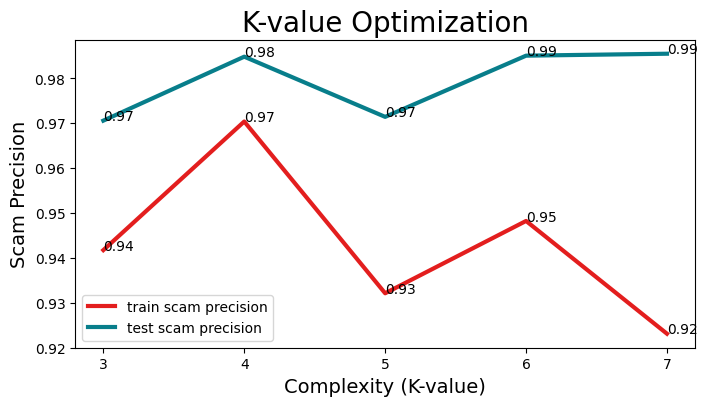

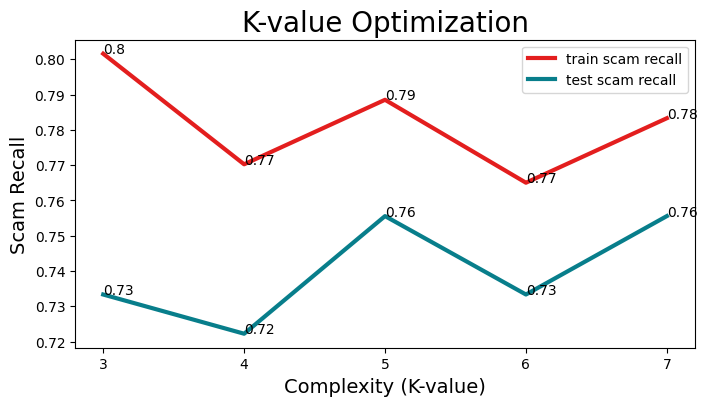

In [7]:
precision_train_df = []
precision_test_df = []
recall_train_df = []
recall_test_df = []

for k in range(3, 8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)

    precision_train = precision_score(y_train, train_predictions)
    precision_test = precision_score(y_test, test_predictions)
    precision_train_df.append({'k': k, 'precision': precision_train})
    precision_test_df.append({'k': k, 'precision': precision_test})

    recall_train = recall_score(y_train, train_predictions)
    recall_test = recall_score(y_test, test_predictions)
    recall_train_df.append({'k': k, 'recall': recall_train})
    recall_test_df.append({'k': k, 'recall': recall_test})

precision_train_df = pd.DataFrame(precision_train_df)
precision_test_df = pd.DataFrame(precision_test_df)

recall_train_df = pd.DataFrame(recall_train_df)
recall_test_df = pd.DataFrame(recall_test_df)


# Plot log precision
plt.figure(figsize=(8, 4))
plt.plot(precision_train_df['k'], precision_train_df['precision'], lw=3, c='#e31e1e', label='train scam precision')
for a,b in zip(precision_train_df['k'], precision_train_df['precision']): 
    plt.text(a, b, str(round(b, 2)))
plt.plot(precision_test_df['k'], precision_test_df['precision'], lw=3, c='#087E8B', label='test scam precision')
for a,b in zip(precision_test_df['k'], precision_test_df['precision']): 
    plt.text(a, b, str(round(b, 2)))
plt.title(f"K-value Optimization", size=20)
plt.xlabel('Complexity (K-value)', size=14)
plt.xticks(np.arange(3, k+1, 1))
plt.ylabel('Scam Precision', size=14)
plt.legend()
plt.show()

# Plot recall
plt.figure(figsize=(8, 4))
plt.plot(recall_train_df['k'], recall_train_df['recall'], lw=3, c='#e31e1e', label='train scam recall')
for a,b in zip(recall_train_df['k'], recall_train_df['recall']): 
    plt.text(a, b, str(round(b, 2)))
plt.plot(recall_test_df['k'], recall_test_df['recall'], lw=3, c='#087E8B', label='test scam recall')
for a,b in zip(recall_test_df['k'], recall_test_df['recall']): 
    plt.text(a, b, str(round(b, 2)))
plt.title(f"K-value Optimization", size=20)
plt.xlabel('Complexity (K-value)', size=14)
plt.xticks(np.arange(3, k+1, 1))
plt.ylabel('Scam Recall', size=14)
plt.legend()
plt.show()

# Model evaluation

In [11]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# PCA
pca = PCA(n_components=13)
pca.fit(X)
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

### Train evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.92      0.78      0.85       383

    accuracy                           1.00    226980
   macro avg       0.96      0.89      0.92    226980
weighted avg       1.00      1.00      1.00    226980



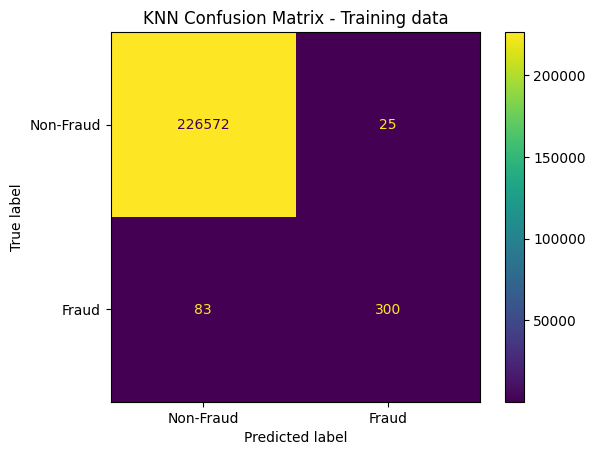

In [12]:
# evaluate model train
print(classification_report(y_train, knn.predict(X_train)))
cm = confusion_matrix(y_train, knn.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot()
plt.title('KNN Confusion Matrix - Training data')
plt.show()

### Test evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.99      0.76      0.86        90

    accuracy                           1.00     56746
   macro avg       0.99      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746



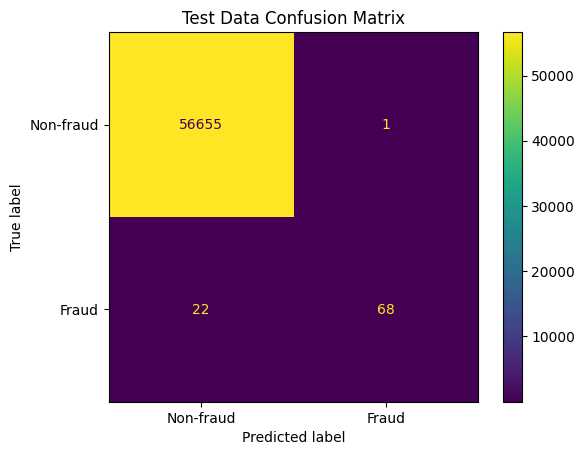

In [10]:
# evaluate model
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot()
plt.title('Test Data Confusion Matrix')
plt.show()

# TODO

### Conclusions

Observing the test data (the training data was not that informative), the important metric recall was lower than with the logistic regression (0.77 for KNN, 0.86 for logistic regression), meaning the KNN model was worse for predicting fraudulent transactions. However, a higher precision was observed (0.26 vs 0.04), leading to a higher f1-score for the KNN-model (0.39 vs 0.08 for the logistic regression).